# A tutorial for the lidar Python package

In [1]:
import lidar
import os
import pkg_resources
import richdem as rd
%matplotlib inline

In [2]:
# identify the sample data directory of the package
package_name = 'lidar'
data_dir = pkg_resources.resource_filename(package_name, 'data/')

# use the sample dem. Change it to your own dem if needed
in_dem = os.path.join(data_dir, 'dem.tif')
# set output directory. By default, use the temp directory under user's home directory
out_dir = os.path.join(os.getcwd(), "temp")

if not os.path.exists(out_dir):
    os.mkdir(out_dir)

In [3]:
# parameters for identifying sinks and delineating nested depressions
min_size = 1000         # minimum number of pixels as a depression
min_depth = 0.3         # minimum depth as a depression
interval = 0.3          # slicing interval for the level-set method
bool_shp = False        # output shapefiles for each individual level

In [4]:
# extracting sinks based on user-defined minimum depression size
out_dem = os.path.join(out_dir, "median.tif")
in_dem = lidar.MedianFilter(in_dem, kernel_size=3, out_file=out_dem)

Median filtering ...
Run time: 0.0352 seconds
Saving dem ...


In [5]:
sink_path = lidar.ExtractSinks(in_dem, min_size, out_dir)

Loading data ...
min = 379.70, max = 410.72, no_data = -3.402823e+38, cell_size = 1.0
Depression filling ...
Saving filled dem ...
Region grouping ...
Computing properties ...
Saving sink dem ...
Saving refined dem ...
Converting raster to vector ...
Total run time:			 0.0940 s



In [6]:
dep_id_path, dep_level_path = lidar.DelineateDepressions(sink_path, min_size, min_depth, interval, out_dir, bool_shp)

Reading data ...
rows, cols: (400, 400)
Pixel resolution: 1.0
Read data time: 0.0059 seconds
Data preparation time: 0.0193 seconds
Total number of regions: 1
Processing Region # 1 ...
=========== Run time statistics =========== 
(rows, cols):			 (400, 400)
Pixel resolution:		 1.0 m
Number of regions:		 1
Data preparation time:		 0.0193 s
Identify level time:		 0.2280 s
Write image time:		 0.0051 s
Polygonize time:		 0.0079 s
Total run time:			 0.2609 s


In [8]:
print('Results are saved in: {}'.format(out_dir))

Results are saved in: /media/hdd/Dropbox/git/lidar/examples/temp


In [9]:
# loading data and results
dem = rd.LoadGDAL(in_dem)
sink = rd.LoadGDAL(sink_path)
dep_id = rd.LoadGDAL(dep_id_path)
dep_level = rd.LoadGDAL(dep_level_path)

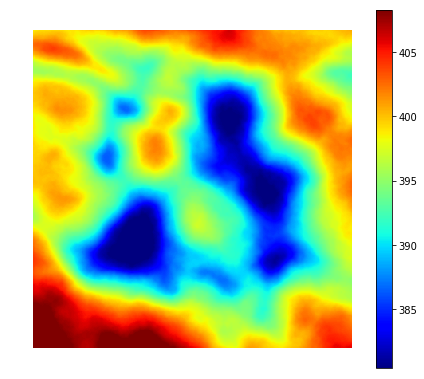

In [10]:
dem_fig = rd.rdShow(dem, ignore_colours=[0], axes=False, cmap='jet', figsize=(6, 5.5))

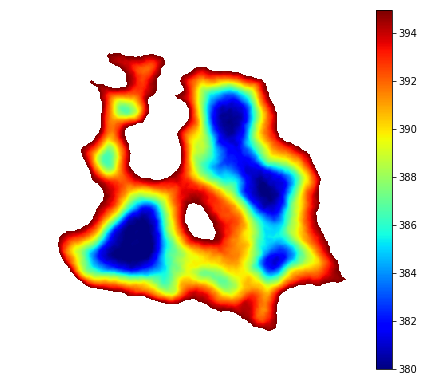

In [11]:
sink_fig = rd.rdShow(sink, ignore_colours=[0], axes=False, cmap='jet', figsize=(6, 5.5))

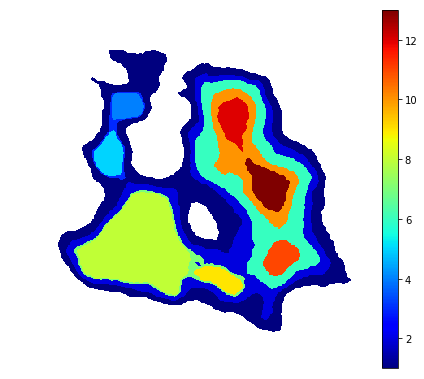

In [12]:
dep_id_fig = rd.rdShow(dep_id, ignore_colours=[0], axes=False, cmap='jet', figsize=(6, 5.5))


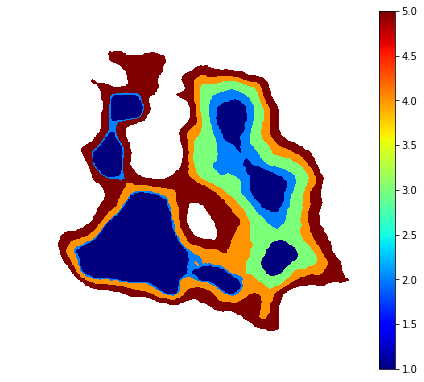

In [13]:
dep_level_path = rd.rdShow(dep_level, ignore_colours=[0], axes=False, cmap='jet', figsize=(6, 5.5))

In [15]:
import lidar
lidar.gui()

Loading data ...
min = 379.66, max = 410.76, no_data = -3.402823e+38, cell_size = 1.0
Depression filling ...
Saving filled dem ...
Region grouping ...
Computing properties ...
Saving sink dem ...
Saving refined dem ...
Converting raster to vector ...
Total run time:			 0.0420 s

Reading data ...
rows, cols: (400, 400)
Pixel resolution: 1.0
Read data time: 0.0013 seconds
Data preparation time: 0.0056 seconds
Total number of regions: 1
Processing Region # 1 ...
=========== Run time statistics =========== 
(rows, cols):			 (400, 400)
Pixel resolution:		 1.0 m
Number of regions:		 1
Data preparation time:		 0.0056 s
Identify level time:		 0.1501 s
Write image time:		 0.0029 s
Polygonize time:		 0.0091 s
Total run time:			 0.1683 s
